In [1]:
import numpy as np
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def obtener_datos_por_recurso(data,nombre_recurso):
    
    data['Fecha'] =  pd.to_datetime(data['Fecha'], format='%Y-%m-%d')
    
    datos_recurso = data[data['Recurso'] == nombre_recurso]
    datos_recurso = datos_recurso.copy()

    datos_recurso = datos_recurso.set_index('Fecha')
    
    datos_recurso['Año'] = datos_recurso.index.year
    datos_recurso['Mes'] = datos_recurso.index.month
    datos_recurso['Dia'] = datos_recurso.index.day_name()
    
    return datos_recurso

In [3]:
def grafico_comportamiento_variables(datos):
    cols_plot = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    nombre_graficas = ['Precio de Oferta Ideal','Precio de Oferta de Despacho','Precio de Oferta Declarado']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(20, 9), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [4]:
data_path = os.path.join('..','..','dataset','Series','Precio','Oferta','Oferta_0.xlsx')
data = pd.read_excel(data_path)

In [5]:
data.head(10)

,Fecha,Recurso,Código Agente,Precio de Oferta Ideal,Precio de Oferta de Despacho,Precio de Oferta Declarado
0,2000-01-01,ALTO ANCHICAYA,EPSG,32.868121,0.000000,0.000000
1,2000-01-01,BAJO ANCHICAYA,EPSG,32.868121,0.000000,0.000000
2,2000-01-01,BARRANCA,ESSG,756.048939,0.000000,0.000000
3,2000-01-01,BARRANQUILLA,CRLG,137.172576,0.000000,0.000000
4,2000-01-01,BETANIA,CHBG,44.951454,43.666667,43.666667
5,2000-01-01,CALIMA,EPSG,32.284788,31.000000,31.000000
6,2000-01-01,CARTAGENA,TRCG,631.806363,0.000000,0.000000
7,2000-01-01,CASALCO,EMGG,49.701454,48.416667,48.416667
8,2000-01-01,CHIVOR,CHVG,48.368121,47.083333,47.083333
9,2000-01-01,FLORES,CRLG,404.340363,0.000000,0.000000


In [6]:
recursos_unicos = pd.unique(data['Recurso'])

In [7]:
recurso = obtener_datos_por_recurso(data,nombre_recurso='SOGAMOSO')

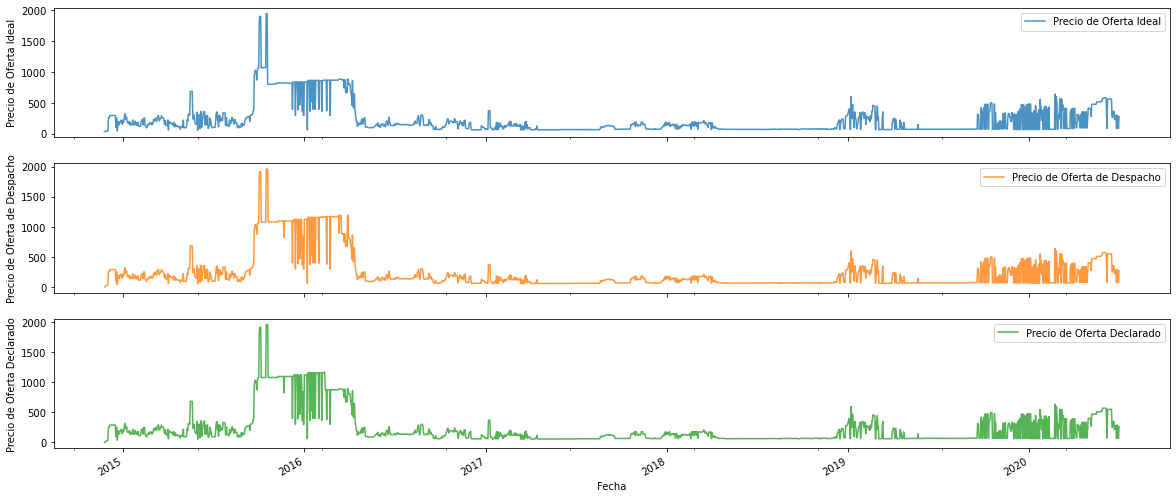

In [8]:
grafico_comportamiento_variables(recurso)

In [9]:
diferencias_list = list()
recursos_list = list()

consolidado_dict = {'Recurso':list(),'Cantidad Datos':list(),'Valores Exactos':list(),
                    'Valores en Cero':list(),'Valores Diferentes':list()}

for nombre_recurso in recursos_unicos:
    
    recurso = obtener_datos_por_recurso(data,nombre_recurso=nombre_recurso)
    mask = recurso['Precio de Oferta de Despacho'] == recurso['Precio de Oferta Declarado']
    
    consolidado_dict['Recurso'].append(nombre_recurso)
    consolidado_dict['Cantidad Datos'].append(len(mask))
    consolidado_dict['Valores Exactos'].append(np.sum(mask))
    
    if len(mask) != np.sum(mask):
        
        valores_no_exactos = recurso[~mask]
        valores_en_cero = valores_no_exactos[(valores_no_exactos['Precio de Oferta de Despacho'] == 0)|
                                             (valores_no_exactos['Precio de Oferta Declarado'] == 0)]

        valores_diferentes_de_cero = valores_no_exactos[(valores_no_exactos['Precio de Oferta de Despacho'] != 0)&
                                                        (valores_no_exactos['Precio de Oferta Declarado'] != 0)]
        diferencias = valores_diferentes_de_cero['Precio de Oferta de Despacho'] - valores_diferentes_de_cero['Precio de Oferta Declarado']
        
        diferencias_list.append(diferencias)
        recursos_list.append(nombre_recurso)
        
        consolidado_dict['Valores en Cero'].append(len(valores_en_cero))
        consolidado_dict['Valores Diferentes'].append(len(mask)-np.sum(mask)-len(valores_en_cero))
    else:
        consolidado_dict['Valores en Cero'].append(0)
        consolidado_dict['Valores Diferentes'].append(len(mask)-np.sum(mask))

In [10]:
'De los {} Recursos unicos, existe {} con valores diferentes y {} donde los valores son iguales'.format(
    len(recursos_unicos),len(diferencias_list),len(recursos_unicos)-len(diferencias_list))

'De los 62 Recursos unicos, existe 49 con valores diferentes y 13 donde los valores son iguales'

## Recursos con valores de Precio Oferta Despacho y Precio Oferta Declarado Diferentes

In [11]:
pd.set_option('display.max_rows', None)
pd.DataFrame(consolidado_dict)

,Recurso,Cantidad Datos,Valores Exactos,Valores en Cero,Valores Diferentes
0,ALTO ANCHICAYA,349,349,0,0
1,BAJO ANCHICAYA,349,349,0,0
2,BARRANCA,2027,2027,0,0
3,BARRANQUILLA,7487,7447,0,40
4,BETANIA,7487,6635,1,851
5,CALIMA,7487,7266,0,221
6,CARTAGENA,7487,7485,0,2
7,CASALCO,1379,1379,0,0
8,CHIVOR,7487,6629,3,855
9,FLORES,7487,7467,0,20


## Distribuciones de las diferencias

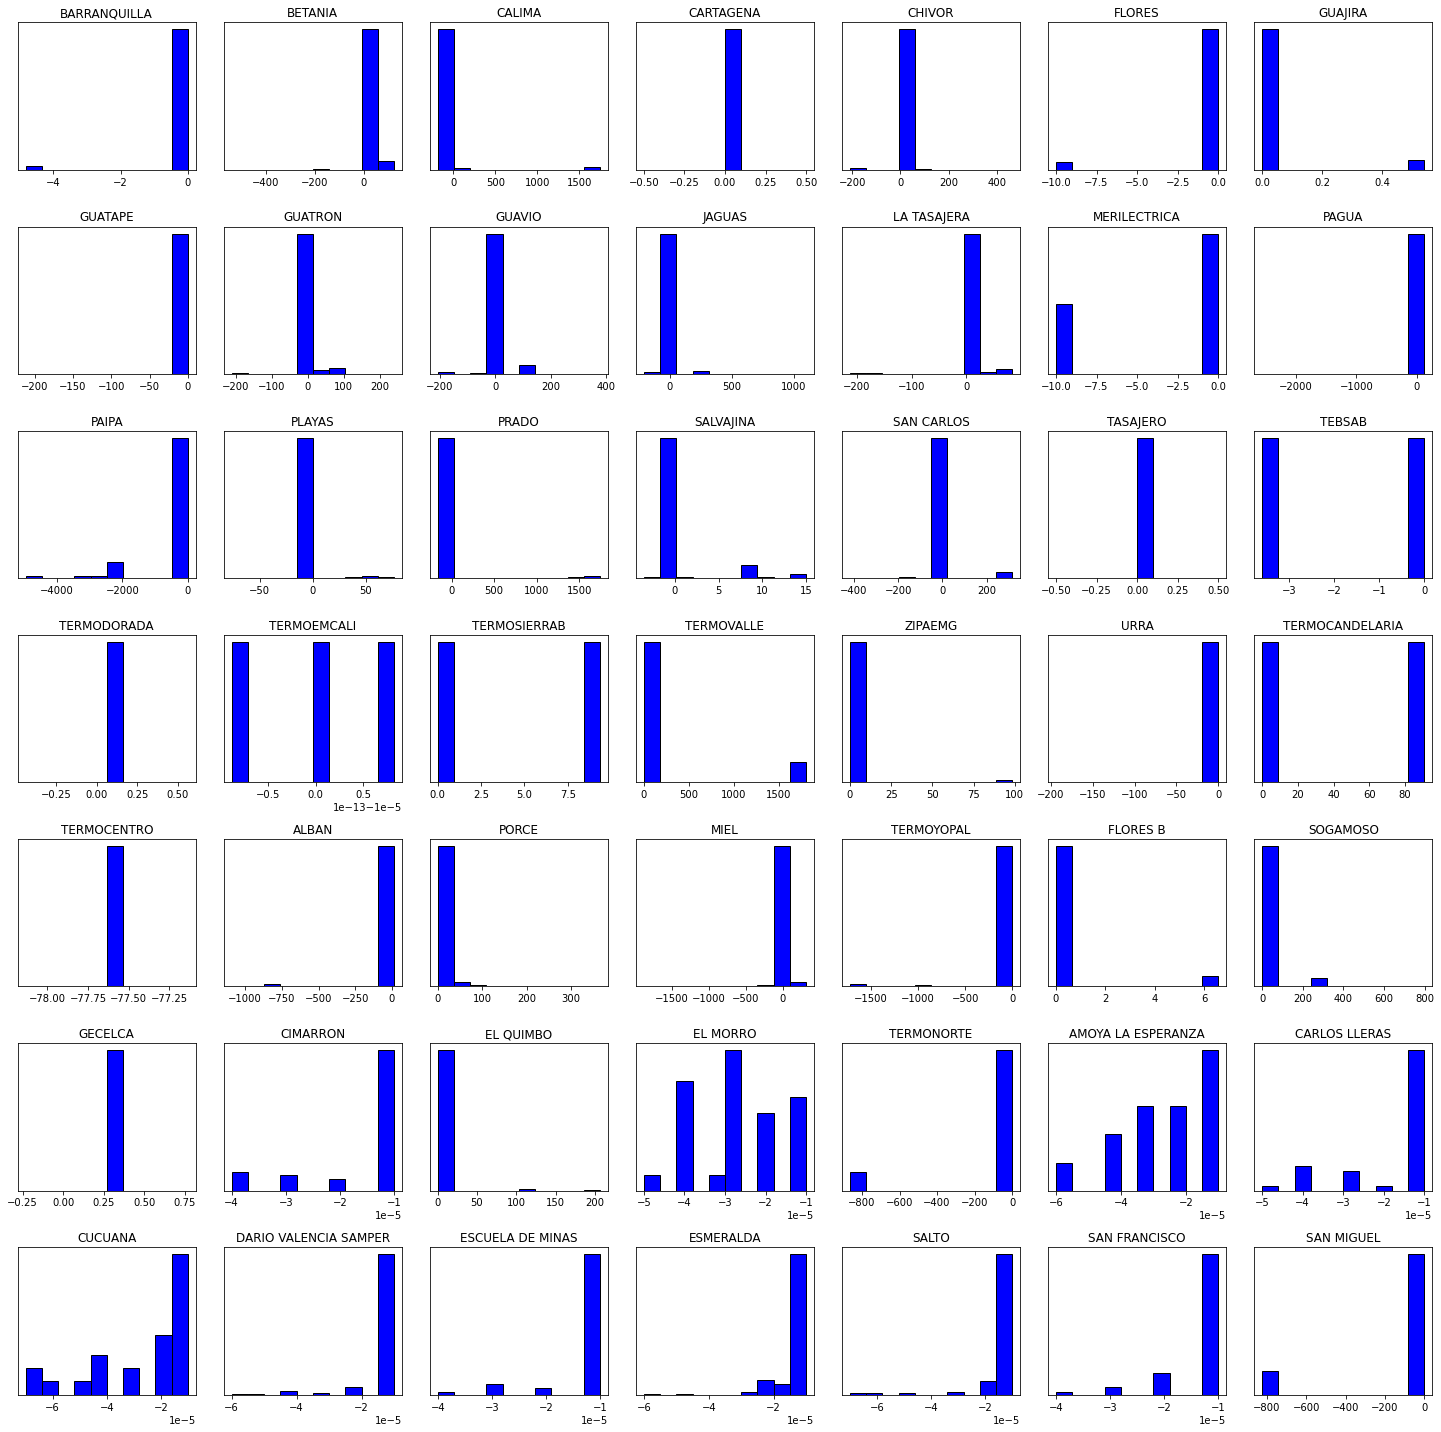

In [12]:
fig, axis = plt.subplots(7,7,figsize=(20,20))
k = 0
for i in range(7):
    for j in range(7):
        title = 'A'
        axis[i][j].set_title(recursos_list[k])
        axis[i][j].hist(diferencias_list[k],color = 'blue', edgecolor = 'black')
        axis[i][j].get_yaxis().set_visible(False)
        k += 1

plt.tight_layout()
plt.show()